Initial state:  128
Probabilities: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00

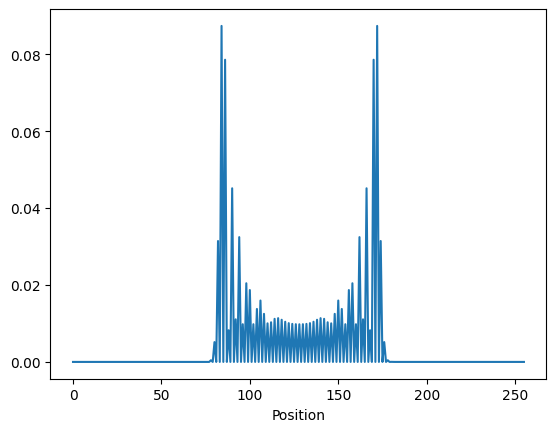

In [26]:
import time
import pennylane as qml
from pennylane import qjit
from pennylane import numpy as np
import matplotlib.pyplot as plt  # Import matplotlib for saving the image


s = 8
wires_x = list(range(s)) #[0,1,2,3,4,5]
coin = [s] # coin space

def shift_op():
     for index in range(s-1):
         control_values = [1] * (s-index-1)
         qml.ctrl(qml.PauliX, control=wires_x[index+1:s], control_values=control_values)(wires=wires_x[index])
     qml.PauliX(wires_x[s-1])

@qml.qnode(qml.device("default.qubit", wires=(wires_x + coin)))


def circuit(steps, state):
     qml.BasisState(state, wires=wires_x)
     qml.StatePrep((np.array([1, -1j]))/(2**0.5), coin)
     for i in range(steps[0]): 
        qml.H(coin)
        qml.ctrl(shift_op, control=coin)()
        qml.ctrl(qml.adjoint(shift_op), control=coin, control_values=[0])()
     return qml.probs(wires=wires_x)

steps = [64] 
state = 2**(s-1)
#state[2**((s-1))] = 1
print("Initial state: ", state)
# Run the circuit
probabilities = circuit(steps, state)
print("Probabilities:", probabilities)
# Plot the probability distribution
plt.plot(probabilities)
plt.xlabel("Position")
plt.show()
_ = qml.draw_mpl(circuit, style="pennylane")(steps, state)